#Ejercicio 02. Métodos Numéricos Básicos
#A. Límite de Difracción para un Telescopio
Como es bien conocido, la habilidad para resolver detalles en una observación astronómica esta limitada (entre otros muchos factores) por la difrección de la luz en el telescopio. Para modelar este efecto,
se puede asumir que la luz de una estrella es emitida a partir de un punto localizado en el infinito.
Cuando esta radiación de longitud de onda λ pasa a través de la apertura circular de un telescopio
(con un radio unitario) y se enfoca en el plano focal, no se produce un solo punto luminoso, sino que
se registra un patrón circular de difracción que consiste de una región central luminosa rodeada de
una serie de anillos concéntricos. La intensidad de la luz en el patrón de difracción esta dada por la
función

\begin{equation}
    I(\rho) = \left( \frac{2J_1 (k\rho)}{k\rho} \right)^2,
\end{equation}

donde $\rho$ es la distancia en el plano focal medida desde el centro del patrón, $k = \frac{2\pi}{\lambda}$ y $J_1 (x)$ es una función de Bessel (ver documento adjunto con la deducción completa). 

Las funciones de Bessel de primera especie están definidas por la relación general

\begin{equation}
    J_m (x) = \frac{1}{\pi} \int_0^{\pi} \cos (m\tau - x \sin \tau ) d\tau,
\end{equation}

con $m$ un entero no-negativo y $x\geq 0$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

---
1. Escriba una función que calcule las funciones de Bessel de primera especie $J_{m}(x)$ utilizando la regla de Simpson con $1000$ puntos en el intervalo de integración.

In [ ]:
#Metodo de integración de Simpson
def Insim(deltax,n,f):
  Insim = (deltax/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
  return Insim

In [ ]:
#Ejemplo x²
a = 0
b = 1
n = 20000000
deltax = (b - a)/(n - 1)
x = np.linspace(a, b, n)
f = x*x
print(Insim(deltax,n,f))

0.3333332833333208


In [ ]:
#Función de Bessel
def Bessel(m,X,Thau,dThau,N):
  F=[]
  v=0
  Bessel=[]
  for i in range(0, len(X)):
    xsin=X[i]*np.sin(Thau)
    f=np.cos(m*Thau-xsin)
    bessel=Insim(dThau,N,f)/np.pi
    F.append(bessel) 
  return F

In [ ]:
#Función que crea dominios luego de ingresar los extremos del intervalo y datos
def dom(a,b,N):
  dX=(b-a)/N
  X=np.linspace(a,b,N)
  return (dX,X)
#Dominio de integración
Dat_int=dom(0,np.pi,1000)
dX_in=Dat_int[0]
X_in=Dat_int[1]
#Dominio de la función de Bessel
Dat=dom(0,20,100)
dX=Dat[0]
X=Dat[1]

In [ ]:
#Error relativo de la función de Bessel definida previamente y la función de la librería scipy
import scipy.special as special
be = special.jv(0,X)
becool = np.array(Bessel(0,X,X_in,dX_in,1000))
errore = (be - becool)/be*100
#print(errore)
print(np.mean(np.abs(errore)))

0.4489255985232058


---
2. Utilice esta función para graficar el comportamiento de las funciones de Bessel de orden $m=0,1,2$ para $0 \leq x \leq 20$.

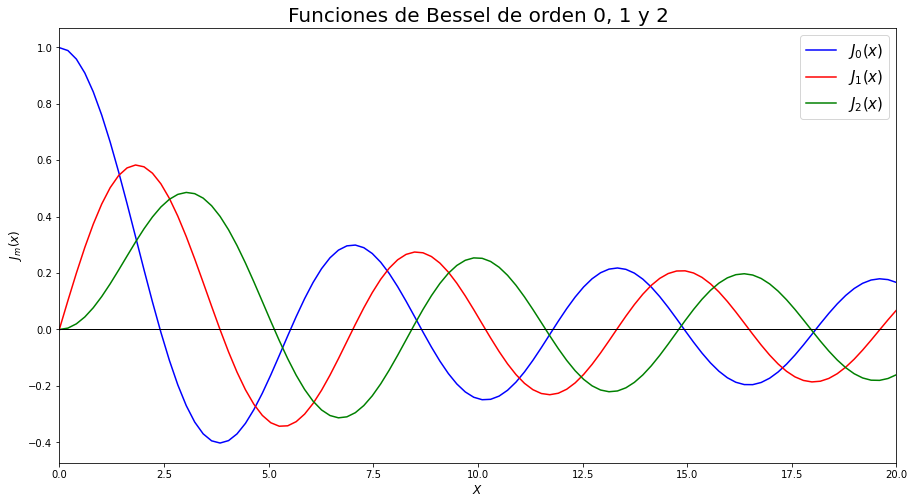

In [ ]:
#Funciones de Bessel de orden 0,1 y 2 con dominio de 0 a 20
J0=Bessel(0,X,X_in,dX_in,1000)
J1=Bessel(1,X,X_in,dX_in,1000)
J2=Bessel(2,X,X_in,dX_in,1000)
#Plot
plt.figure(figsize=(15,8))
plt.plot(X,J0,color='blue',label='$J_{0}(x)$')
plt.plot(X,J1,color='red',label='$J_{1}(x)$')
plt.plot(X,J2,color='green',label='$J_{2}(x)$')
#Bold axid
plt.plot([0,20], [0,0], color="k", linewidth=1)
plt.title('Funciones de Bessel de orden 0, 1 y 2',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('$X$',fontsize=12)
plt.xlim(0,20)
plt.ylabel('$J_{m}(x)$',fontsize=12)
plt.show()

---
3. Utilice esta función para obtener un gráfico de densidad para la intensidad del patrón de difracción circular para una fuente puntual con $\lambda =500nm$ en la región $0 \leq \rho \leq 1\mu m$.

In [ ]:
#Creación de variables
lam=0.5
k=2*np.pi/lam
x =np.linspace(-1,1,10000)
y =np.linspace(-1,1,10000)
rho=[]
for i in range(0,len(x)):
  if x[i]**2+y[i]**2<=1:
    r=(x[i]**2+y[i]**2)**0.5
    rho.append(r)
Rho=k*np.array(rho)
#Intensidad
Bes = np.array(Bessel(1,Rho,X_in,dX_in,1000))
I = (2*Bes/Rho)**2

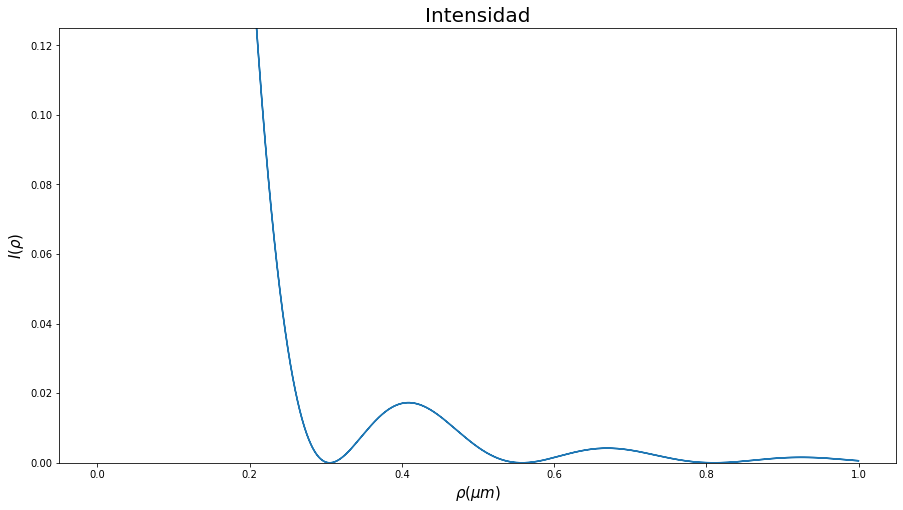

In [ ]:
#Gráfica de la intensidad respecto a rho
plt.figure(figsize=(15,8))
plt.plot(rho,I)
plt.title('Intensidad',fontsize=20)
plt.ylim(0,0.125)
plt.xlabel(r'$\rho(\mu m)$',fontsize=15)
plt.ylabel(r'$I(\rho)$',fontsize=15)
plt.show()

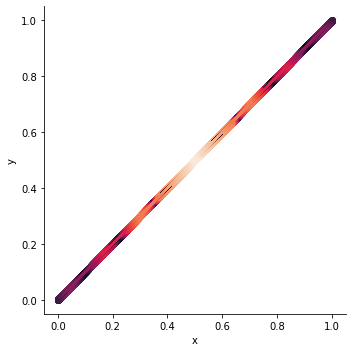

In [ ]:
#Creación de un data frames
Pan=np.zeros((7070,0))
Panda=pd.DataFrame(Pan) 
Panda['rho']=rho
Panda['I']=I
Panda['x']=np.linspace(0,1,7070)
Panda['y']=np.linspace(0,1,7070)
#################################################################################
Airi= CC_2= sns.lmplot(x = 'x',y = 'y', data = Panda, hue='I', palette='rocket', legend=False, ci=None)

<Figure size 432x288 with 0 Axes>

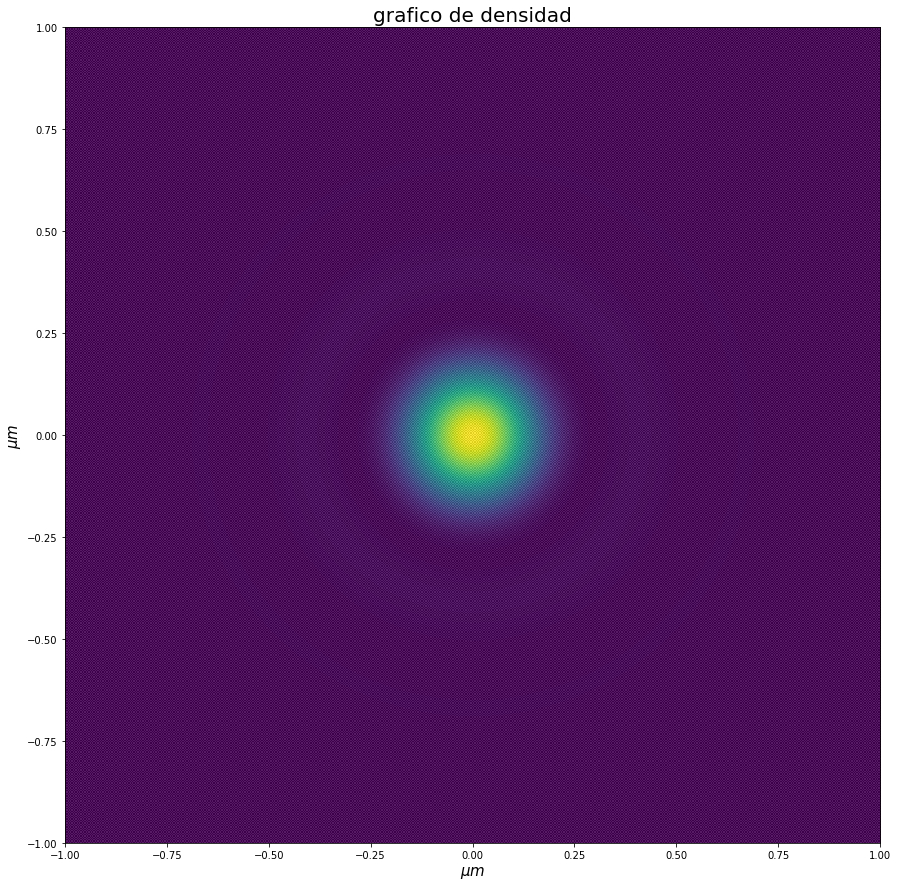

In [ ]:
#Gráfico de densidad para la intensidad del patrón de difracción circular para una fuente puntual
def BesselF(x, y):
  r=k*np.sqrt(x**2+y**2)
  return (2*special.jv(1,r)/r)**2
def BesselF2(x, y):
  r=k*np.sqrt(x**2+y**2)
  return (2*Bessel(1,r,X_in,dX_in,1000)/r)**2

xv = np.linspace(-1.0, 1.0, 1000)
yv = np.linspace(-1.0, 1.0, 1000)
Xv, Yv = np.meshgrid(xv, yv)

extent = np.min(xv), np.max(xv), np.min(yv), np.max(yv)
fig = plt.figure(frameon=False)
plt.figure(figsize=(15,15))
Z1 = np.add.outer(range(1000), range(1000)) % 2 
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
Z1=[]
for i in range(0,len(xv)):
  z2=
Z2 = BesselF(Xv, Yv)

im2 = plt.imshow(Z2, alpha=.9, interpolation='bilinear',extent=extent)
plt.title('grafico de densidad',fontsize=20)
plt.xlabel(r'$\mu m$',fontsize=15)
plt.ylabel(r'$\mu m$',fontsize=15)
#plt.xlim(-1.0,1.0)
#plt.ylim(-1.0,1.0)
plt.show()


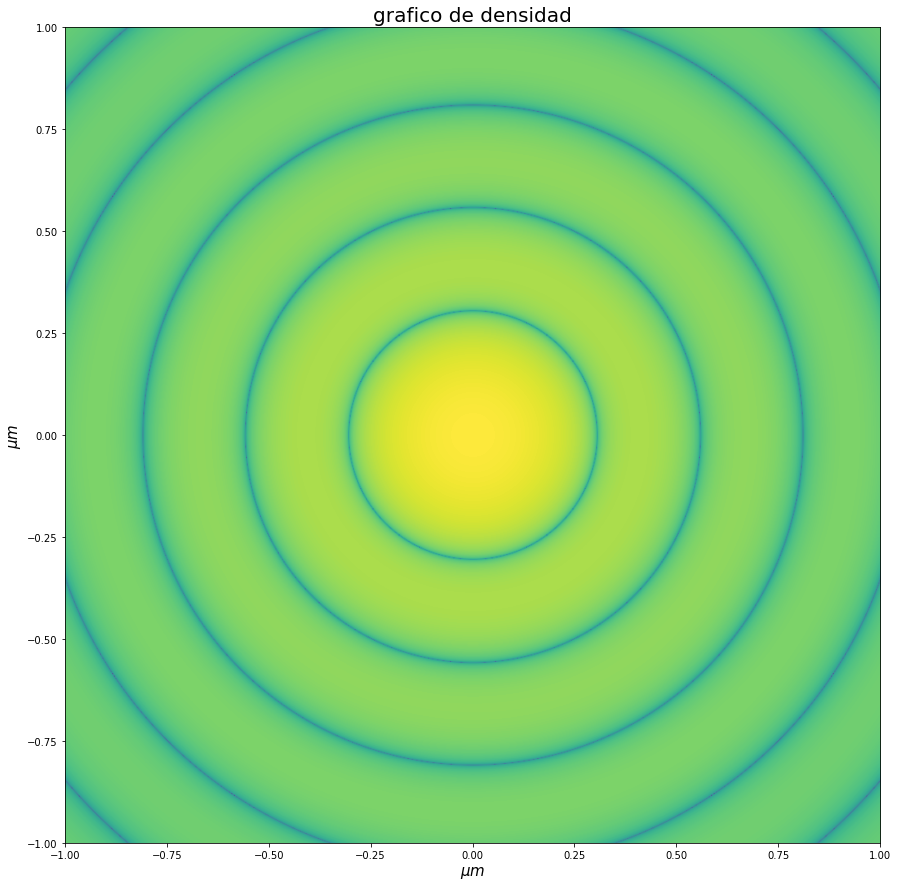

In [ ]:
plt.figure(figsize=(15,15))
im2 = plt.imshow(np.log(Z2), alpha=.9, interpolation='bilinear',extent=extent) #Resaltando la importancia del logaritmo 
plt.title('grafico de densidad',fontsize=20)
plt.xlabel(r'$\mu m$',fontsize=15)
plt.ylabel(r'$\mu m$',fontsize=15)
#plt.xlim(-1.0,1.0)
#plt.ylim(-1.0,1.0)
plt.show()

---
4. Localice los valores de $\rho$ en los cuales se ubican los 4 primeros máximos del patrón de intensidad.

In [ ]:
#Definición utilizada en clase para la derivada numérica de una función discreta
def Derivative(x, f):
      # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
  
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

(-5.0, 5.0)

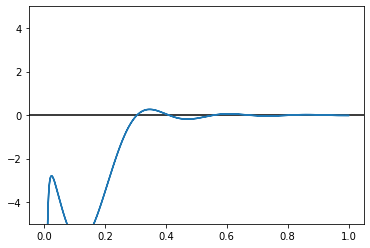

In [ ]:
#Gráfico de la primera derivada de la intensidad respecto a rho
plt.axhline(color = 'black')
plt.plot(Derivative(np.array(rho),I)[:,0],Derivative(np.array(rho),I)[:,1])
plt.ylim(-5,5)

In [ ]:
#Resultados de la primera derivada (en array)
Primera_der = Derivative(np.array(rho),I)[:,1]
print(Primera_der,len(Primera_der))
Derzero = Primera_der[Primera_der == 0]
print(Derzero)
talvez = Primera_der[(Primera_der > -1e-4) & (Primera_der < 1e-4)]
#talvez

[-0.01771549 -0.01773308 -0.0177679  ... -0.0177679  -0.01773308
 -0.01771549] 7070
[]


In [ ]:
#Función que encuentra la segunda derivada
def TwoDerivative(x, f):
    #Número de puntos
    N = len(x)
    df2dx2 = np.zeros([N, 2])
    df2dx2[:,0] = x
  
    #Derivada
    for i in range(1,N-1): 
      h1 = x[i] - x[i-1]
      h2 = x[i+1] - x[i]
      df2dx2[i,1] = (f[i+1] + f[i-1] -2*f[i])/(h1**2)

    return df2dx2

In [ ]:
#Resultados de la segunda derivada (en array)
Segunda_der = TwoDerivative(np.array(rho),I)[:,1]
#print(Segunda_der,len(Segunda_der))
Negativas = Segunda_der[Segunda_der < 0]
#print(Negativas,len(Negativas))

In [ ]:
#Creación de un dataframe con los valores encontrados en la primera y segunda derivada de los datos
Pander=np.zeros((7070,0))
Pandader=pd.DataFrame(Pander) 
Pandader['Intensidad']=I
Pandader['rho'] = rho
Pandader['1era Derivada']=Primera_der
Pandader['2da Derivada']=Segunda_der
Pandader 

,Intensidad,rho,1era Derivada,2da Derivada
0,0.000594,0.999808,-0.017715,0.000000
1,0.000599,0.999525,-0.017733,0.124402
2,0.000604,0.999242,-0.017768,0.121769
3,0.000609,0.998959,-0.017802,0.119125
4,0.000614,0.998676,-0.017835,0.116472
...,...,...,...,...
7065,0.000614,0.998676,-0.017835,0.116472
7066,0.000609,0.998959,-0.017802,0.119125
7067,0.000604,0.999242,-0.017768,0.121769
7068,0.000599,0.999525,-0.017733,0.124402


In [ ]:
#Agrupación de los datos con una tolerancia en la primera derivada de -1e-4 y 1e-4 respecto a 0
Derzero1 = Pandader[Pandader['1era Derivada'] > -1e-4]
Derzero2 = Derzero1[Derzero1['1era Derivada'] < 1e-4]
Maximos = Derzero2[Derzero2['2da Derivada'] < 0]
Maximos

,Intensidad,rho,1era Derivada,2da Derivada
265,0.001575,0.924847,-0.000060,-0.500668
266,0.001575,0.924564,0.000082,-0.501127
1167,0.004201,0.669697,0.000089,-1.319146
5902,0.004201,0.669697,0.000089,-1.319146
6803,0.001575,0.924564,0.000082,-0.501127
6804,0.001575,0.924847,-0.000060,-0.500668


In [ ]:
#Agrupación de los datos con una tolerancia en la primera derivada de -1e-4 y 1e-4 respecto a 0
Derzero1 = Pandader[Pandader['1era Derivada'] > -1e-3]
Derzero2 = Derzero1[Derzero1['1era Derivada'] < 1e-3]
Maximos = Derzero2[Derzero2['2da Derivada'] < 0]
Maximos

,Intensidad,rho,1era Derivada,2da Derivada
259,0.001574,0.926544,-0.000907,-0.497399
260,0.001574,0.926261,-0.000766,-0.498005
261,0.001574,0.925978,-0.000625,-0.498586
262,0.001574,0.925695,-0.000484,-0.499144
263,0.001574,0.925412,-0.000343,-0.499677
264,0.001575,0.925130,-0.000202,-0.500185
265,0.001575,0.924847,-0.000060,-0.500668
266,0.001575,0.924564,0.000082,-0.501127
267,0.001575,0.924281,0.000223,-0.501561
268,0.001574,0.923998,0.000365,-0.501970


In [ ]:
#Agrupación de los datos respecgto al rho, es decir, limitando un intervalo
Maximo = Maximos[Maximos['rho'] < 0.5]
Maximo

,Intensidad,rho,1era Derivada,2da Derivada
2089,0.017292,0.408890,-0.000735,-5.481693
2090,0.017292,0.408607,0.000817,-5.493095
4979,0.017292,0.408607,0.000817,-5.493095
4980,0.017292,0.408890,-0.000735,-5.481693


In [19]:
print('Los máximos del patrón de intensidad son 0.408, 0.924 y 0.669697') #Ya que son los valores que cumplen las condiciones para ser máximo y se repiten en el conjunto de datos similares

Los máximos del patrón de intensidad son 0.408, 0.924 y 0.669697
